# <font color = 'red'>Transmission Line Fault Detection & Classification</font>

## Import Required Libraries

In [275]:
# Importing libraries
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

## Previewing the Datasets

In [276]:
# Loading the detect dataset
detect_df = pd.read_csv('detect_dataset.csv')

# Loading the Class dataset
class_df = pd.read_csv('classData.csv')

In [277]:
detect_df.head()

Output (S)          Ia        Ib          Ic        Va        Vb        Vc  \
0           0 -170.472196  9.219613  161.252583  0.054490 -0.659921  0.605431   
1           0 -122.235754  6.168667  116.067087  0.102000 -0.628612  0.526202   
2           0  -90.161474  3.813632   86.347841  0.141026 -0.605277  0.464251   
3           0  -79.904916  2.398803   77.506112  0.156272 -0.602235  0.445963   
4           0  -63.885255  0.590667   63.294587  0.180451 -0.591501  0.411050   

   Unnamed: 7  Unnamed: 8  
0         NaN         NaN  
1         NaN         NaN  
2         NaN         NaN  
3         NaN         NaN  
4         NaN         NaN

In [278]:
class_df.head()

G  C  B  A          Ia          Ib          Ic        Va        Vb  \
0  1  0  0  1 -151.291812   -9.677452   85.800162  0.400750 -0.132935   
1  1  0  0  1 -336.186183  -76.283262   18.328897  0.312732 -0.123633   
2  1  0  0  1 -502.891583 -174.648023  -80.924663  0.265728 -0.114301   
3  1  0  0  1 -593.941905 -217.703359 -124.891924  0.235511 -0.104940   
4  1  0  0  1 -643.663617 -224.159427 -132.282815  0.209537 -0.095554   

         Vc  
0 -0.267815  
1 -0.189099  
2 -0.151428  
3 -0.130570  
4 -0.113983

## Checking the datasets

In [279]:
# Checking the column names for both datasets
print('Columns for detect_df:', detect_df.columns)

print('Columns for class_df:', class_df.columns)

Columns for detect_df: Index(['Output (S)', 'Ia', 'Ib', 'Ic', 'Va', 'Vb', 'Vc', 'Unnamed: 7',
       'Unnamed: 8'],
      dtype='object')
Columns for class_df: Index(['G', 'C', 'B', 'A', 'Ia', 'Ib', 'Ic', 'Va', 'Vb', 'Vc'], dtype='object')


In [280]:
# Checking the shapes for both datasets

# detect_df
print(f"Detection dataset has {detect_df.shape[0]} rows and {detect_df.shape[1]} columns.")

# class_df
print(f"Dataset for classification has {class_df.shape[0]} rows and {class_df.shape[1]} columns.")

Detection dataset has 12001 rows and 9 columns.
Dataset for classification has 7861 rows and 10 columns.


In [281]:
# Checking the sizes of each dataset
print('Detect_df size:', detect_df.size)
print('Class_df size:', class_df.size)

Detect_df size: 108009
Class_df size: 78610


Size and shape of a dataframe in pandas: Size of a dataframe is the number of rows * number of columns. Shape of a dataframe gets the number of rows and number of columns of the dataframe.

## Data Preparation
### Uniformity

In [282]:
# Checking data information in detect_df
detect_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12001 entries, 0 to 12000
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Output (S)  12001 non-null  int64  
 1   Ia          12001 non-null  float64
 2   Ib          12001 non-null  float64
 3   Ic          12001 non-null  float64
 4   Va          12001 non-null  float64
 5   Vb          12001 non-null  float64
 6   Vc          12001 non-null  float64
 7   Unnamed: 7  0 non-null      float64
 8   Unnamed: 8  0 non-null      float64
dtypes: float64(8), int64(1)
memory usage: 843.9 KB


The detection dataset contains integers and float values and all the variables are in the correct data types.

In [283]:
# Checking the information in class_df
class_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7861 entries, 0 to 7860
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   G       7861 non-null   int64  
 1   C       7861 non-null   int64  
 2   B       7861 non-null   int64  
 3   A       7861 non-null   int64  
 4   Ia      7861 non-null   float64
 5   Ib      7861 non-null   float64
 6   Ic      7861 non-null   float64
 7   Va      7861 non-null   float64
 8   Vb      7861 non-null   float64
 9   Vc      7861 non-null   float64
dtypes: float64(6), int64(4)
memory usage: 614.3 KB


The classification dataset contains integers and float values and all the variables are in the correct data types.

### Completeness

In [284]:
# Checking for null values in detect dataset

detect_df.isna().sum()

Output (S)        0
Ia                0
Ib                0
Ic                0
Va                0
Vb                0
Vc                0
Unnamed: 7    12001
Unnamed: 8    12001
dtype: int64

Each of columns 7&8 has 12001 missing values.

In [285]:
# Checking the percentage of missing values per column

percent_missing = detect_df.isnull().sum() * 100 / len(detect_df)
missing_values_detect_df = pd.DataFrame({'column_name': detect_df.columns,
                                 'percent_missing': percent_missing})
missing_values_detect_df

column_name  percent_missing
Output (S)  Output (S)              0.0
Ia                  Ia              0.0
Ib                  Ib              0.0
Ic                  Ic              0.0
Va                  Va              0.0
Vb                  Vb              0.0
Vc                  Vc              0.0
Unnamed: 7  Unnamed: 7            100.0
Unnamed: 8  Unnamed: 8            100.0

In [286]:
# Dropping the last 2 columns from detect_df dataset.

detect_df = detect_df.drop(detect_df[['Unnamed: 7', 'Unnamed: 8']],axis=1)
detect_df.head()

Output (S)          Ia        Ib          Ic        Va        Vb        Vc
0           0 -170.472196  9.219613  161.252583  0.054490 -0.659921  0.605431
1           0 -122.235754  6.168667  116.067087  0.102000 -0.628612  0.526202
2           0  -90.161474  3.813632   86.347841  0.141026 -0.605277  0.464251
3           0  -79.904916  2.398803   77.506112  0.156272 -0.602235  0.445963
4           0  -63.885255  0.590667   63.294587  0.180451 -0.591501  0.411050

In [287]:
# Checking if all null values have been dropped

detect_df.isna().sum()

Output (S)    0
Ia            0
Ib            0
Ic            0
Va            0
Vb            0
Vc            0
dtype: int64

In [288]:
# Checking sum of null values in class_df

class_df.isna().sum()

G     0
C     0
B     0
A     0
Ia    0
Ib    0
Ic    0
Va    0
Vb    0
Vc    0
dtype: int64

### Consistency

In [289]:
# Checking for duplicates in both datasets
print(f"Detection dataset has {detect_df.duplicated().sum()} duplicate values.")

print(f"Classification has {class_df.duplicated().sum()} duplicate values.")

Detection dataset has 0 duplicate values.
Classification has 0 duplicate values.


### Outlier Treatment

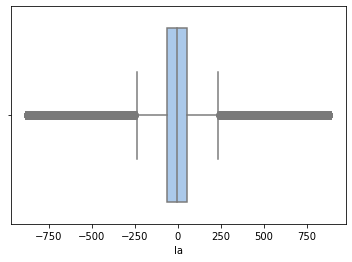

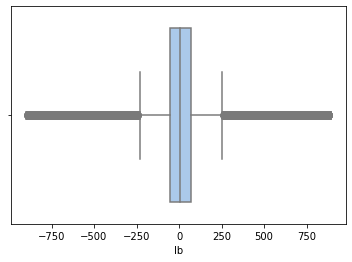

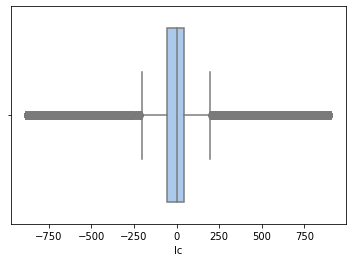

In [290]:
# Checking for outliers Current in detect_df
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

sns.boxplot('Ia', data=detect_df, palette="pastel")
plt.show()
sns.boxplot('Ib', data=detect_df, palette="pastel")
plt.show()
sns.boxplot('Ic', data=detect_df, palette="pastel")
plt.show()

There are outliers for Current in each of the 3 phases.

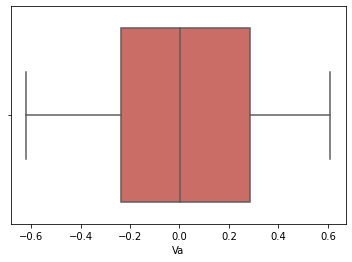

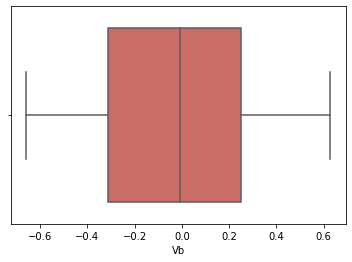

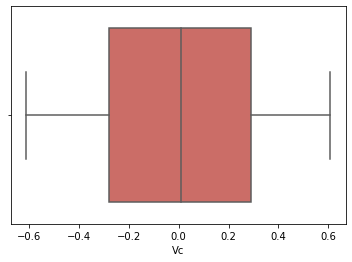

In [291]:
# Checking for outliers Voltage in detect_df

sns.boxplot('Va',data=detect_df, palette='hls')
plt.show()
sns.boxplot('Vb', data=detect_df, palette='hls')
plt.show()
sns.boxplot('Vc', data=detect_df, palette='hls')
plt.show()

There are no outliers for voltage in any of the 3 phases.

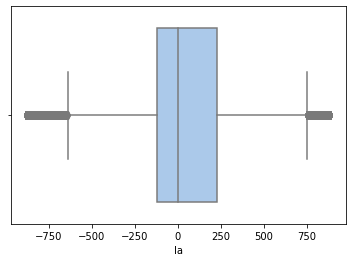

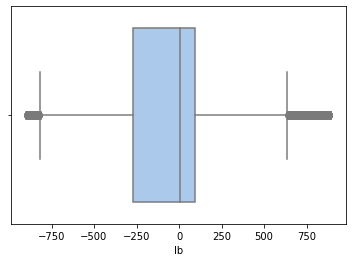

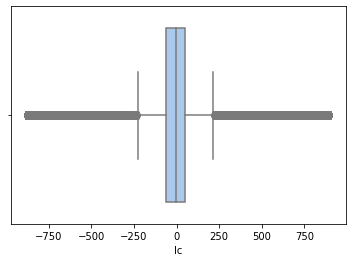

In [292]:
# Checking for outliers Current in class_df

sns.boxplot('Ia', data=class_df, palette="pastel")
plt.show()
sns.boxplot('Ib', data=class_df, palette="pastel")
plt.show()
sns.boxplot('Ic', data=class_df, palette="pastel")
plt.show()

There are outliers for Current in each of the 3 phases in classification dataset.

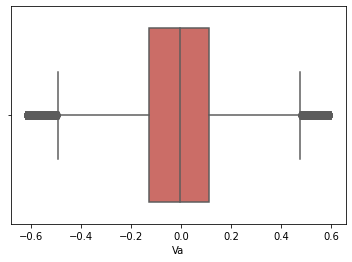

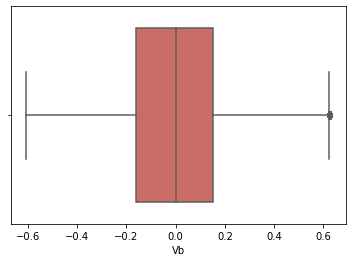

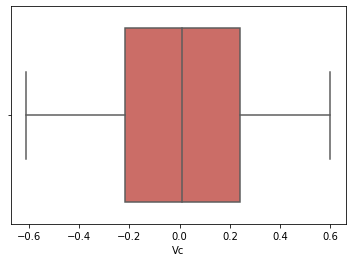

In [293]:
# Checking for outliers Voltage in class_df

sns.boxplot('Va',data=class_df, palette='hls')
plt.show()
sns.boxplot('Vb', data=class_df, palette='hls')
plt.show()
sns.boxplot('Vc', data=class_df, palette='hls')
plt.show()

In the classification dataset,both Va and Vb have outliers. Vc does not have outliers.

Surges are common in power transmission and therefore outliers are expected and significant in our study. Dropping outliers would negatively affect our findings.

## Exploratory Data Analysis (EDA)

### Univariate Analysis

In [294]:
# Obtaining the statistical properties of the variables in detect_df

detect_df.describe()

Output (S)            Ia            Ib            Ic            Va  \
count  12001.000000  12001.000000  12001.000000  12001.000000  12001.000000   
mean       0.457962      6.709369    -26.557793     22.353043      0.010517   
std        0.498250    377.158470    357.458613    302.052809      0.346221   
min        0.000000   -883.542316   -900.526951   -883.357762     -0.620748   
25%        0.000000    -64.348986    -51.421937    -54.562257     -0.237610   
50%        0.000000     -3.239788      4.711283     -0.399419      0.002465   
75%        1.000000     53.823453     69.637787     45.274542      0.285078   
max        1.000000    885.738571    889.868884    901.274261      0.609864   

                 Vb            Vc  
count  12001.000000  12001.000000  
mean      -0.015498      0.004980  
std        0.357644      0.349272  
min       -0.659921     -0.612709  
25%       -0.313721     -0.278951  
50%       -0.007192      0.008381  
75%        0.248681      0.289681  
max        0.627875      0.608243

In [295]:
# Obtaining the statistical properties of the variables in class_df

class_df.describe()

G            C            B            A           Ia  \
count  7861.000000  7861.000000  7861.000000  7861.000000  7861.000000   
mean      0.432006     0.411271     0.555527     0.571429    13.721194   
std       0.495387     0.492095     0.496939     0.494903   464.741671   
min       0.000000     0.000000     0.000000     0.000000  -883.542316   
25%       0.000000     0.000000     0.000000     0.000000  -119.802518   
50%       0.000000     0.000000     1.000000     1.000000     2.042805   
75%       1.000000     1.000000     1.000000     1.000000   227.246377   
max       1.000000     1.000000     1.000000     1.000000   885.738571   

                Ib           Ic           Va           Vb           Vc  
count  7861.000000  7861.000000  7861.000000  7861.000000  7861.000000  
mean    -44.845268    34.392394    -0.007667     0.001152     0.006515  
std     439.269195   371.107412     0.289150     0.313437     0.307897  
min    -900.526951  -883.357762    -0.620748    -0.608016    -0.612709  
25%    -271.845947   -61.034219    -0.130287    -0.159507    -0.215977  
50%       5.513317    -4.326711    -0.005290     0.001620     0.009281  
75%      91.194282    49.115141     0.111627     0.153507     0.239973  
max     889.868884   901.274261     0.595342     0.627875     0.600179

0    6505
1    5496
Name: Output (S), dtype: int64 



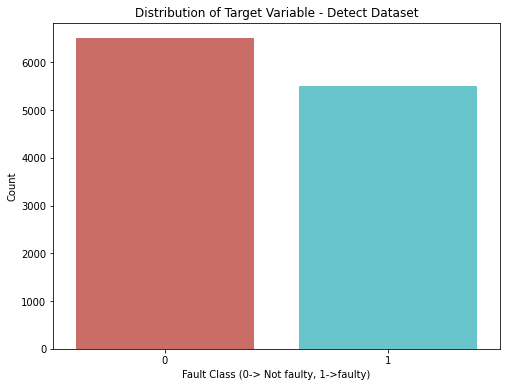

In [296]:
# Checking class balance for our target variable and confirm that it is binary. Uses sns.countplot()

import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize = (8,6))
print(detect_df['Output (S)'].value_counts(),"\n")
sns.countplot(x=detect_df['Output (S)'], palette='hls')
plt.title('Distribution of Target Variable - Detect Dataset')
plt.xlabel('Fault Class (0-> Not faulty, 1->faulty)')
plt.ylabel('Count')
plt.show()

Our target variable is unbalanced with 6505 non-faulty observations and 5496 faulty records. This shall be resolved under data preprocessing for detect dataset.

### Histograms & Kernel Density Estimate (KDE)

For Current Ia



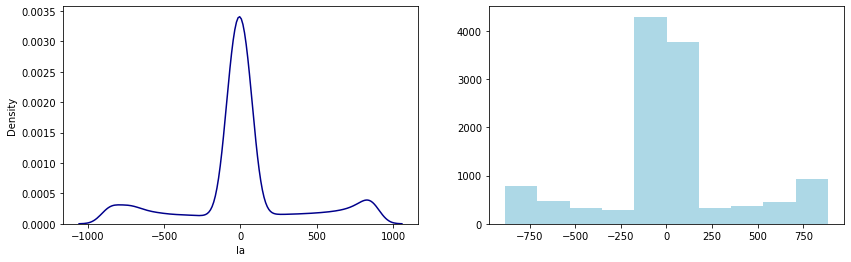

For Current Ib



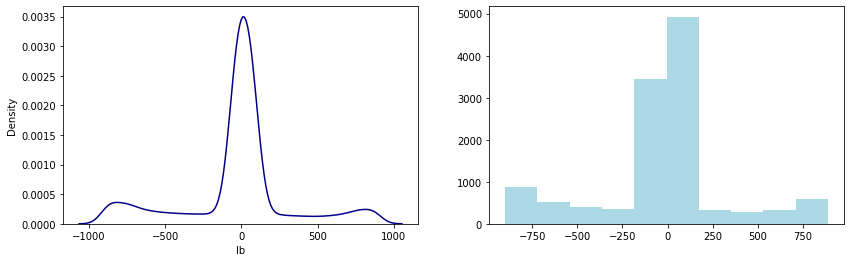

For Current Ic



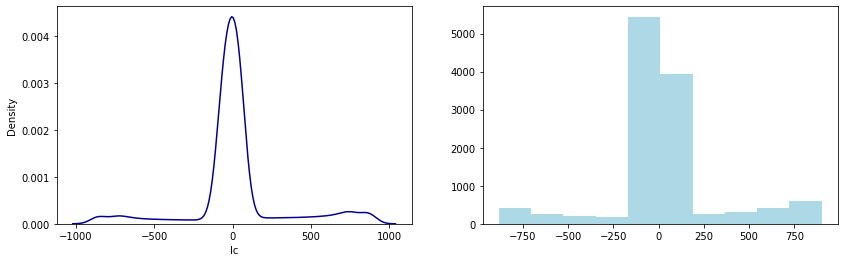

In [297]:
# Visualizing distribution of current in the 3 phases

for n,m in enumerate(detect_df.columns[1:4]):
    
    print(f"For Current {m}\n")
    plt.subplots(1,2,figsize=(14,4))
    plt.subplot(1,2,1) #the figure has 1 row, 2 columns, and this plot is the first plot.
    sns.kdeplot(x=detect_df[m],color='darkblue')

    plt.subplot(122)
    plt.hist(x=detect_df[m],color='lightblue')
    plt.show()

Current observations for the 3 phases is follows a gaussian distribution.

For Voltage Va



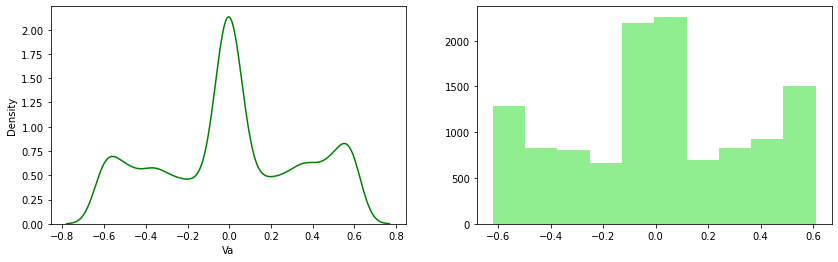

For Voltage Vb



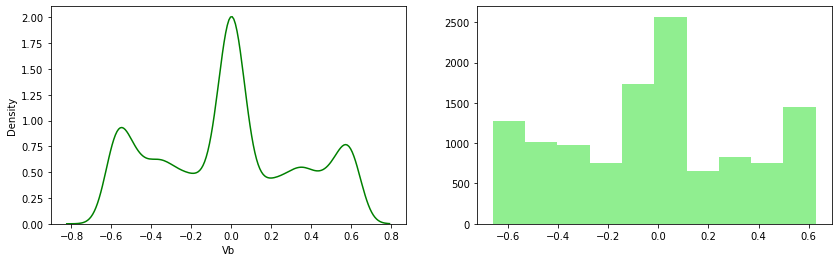

For Voltage Vc



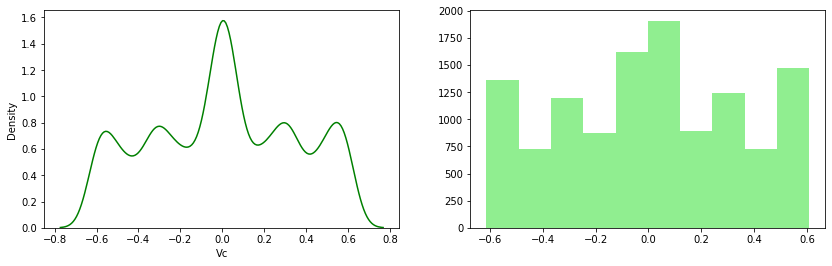

In [298]:
# Visualizing distribution of voltage in the 3 phases

for n,m in enumerate(detect_df.columns[4:]):
    
    print(f"For Voltage {m}\n")
    plt.subplots(1,2,figsize=(14,4))
    plt.subplot(121)
    sns.kdeplot(x=detect_df[m],color='green')

    plt.subplot(122)
    plt.hist(x=detect_df[m],color='lightgreen')
    plt.show()

Distribution of Voltage in the 3 phases follows a normal distribution.

### Line Plots
### Viewing current simulations for the 3-phases

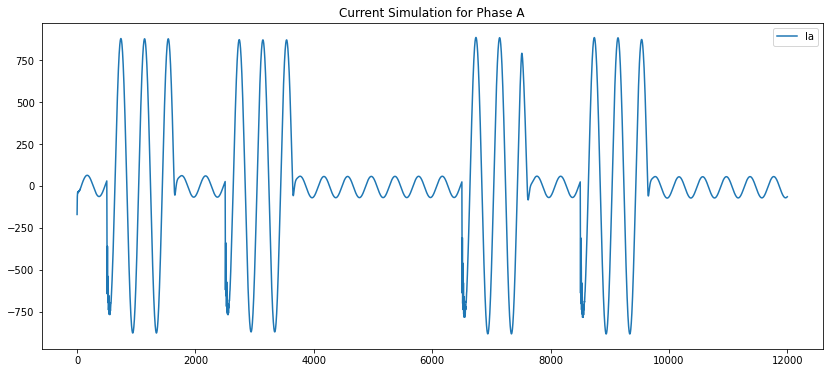

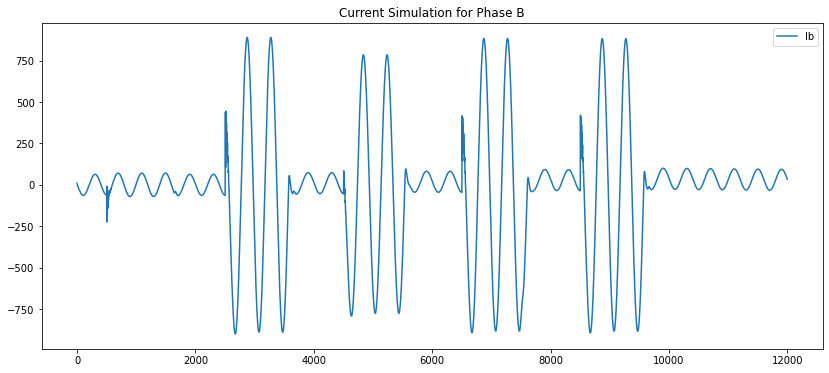

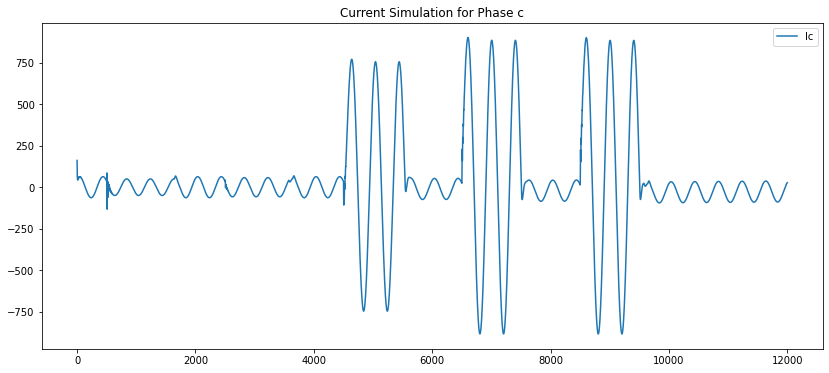

In [299]:
# Plotting the line plots for each phase
fig, ax=plt.subplots(figsize=(14,6))
detect_df.plot(y='Ia', ax=ax)
plt.title('Current Simulation for Phase A')
plt.show()

fig, ax=plt.subplots(figsize=(14,6))
detect_df.plot(y='Ib', ax=ax)
plt.title('Current Simulation for Phase B')
plt.show()

fig, ax=plt.subplots(figsize=(14,6))
detect_df.plot(y='Ic', ax=ax)
plt.title('Current Simulation for Phase c')
plt.show()

### Viewing Voltage simulations for the 3-phases

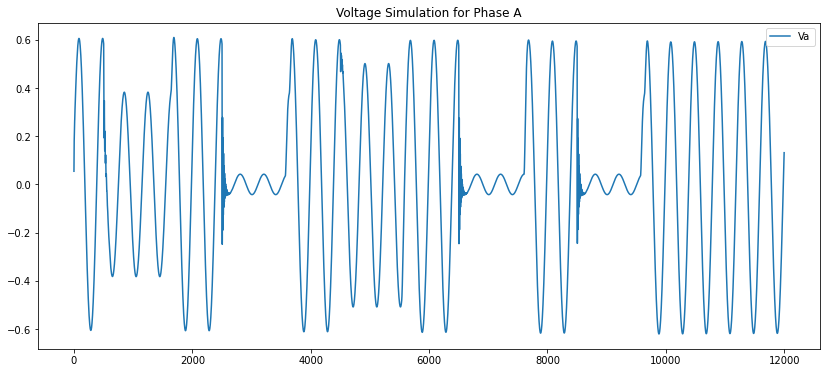

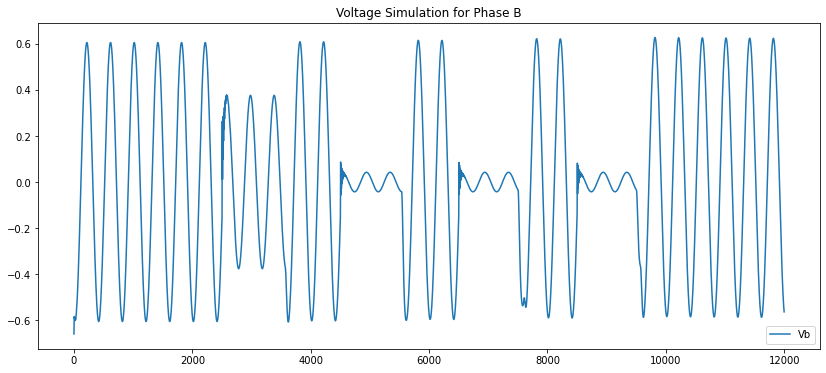

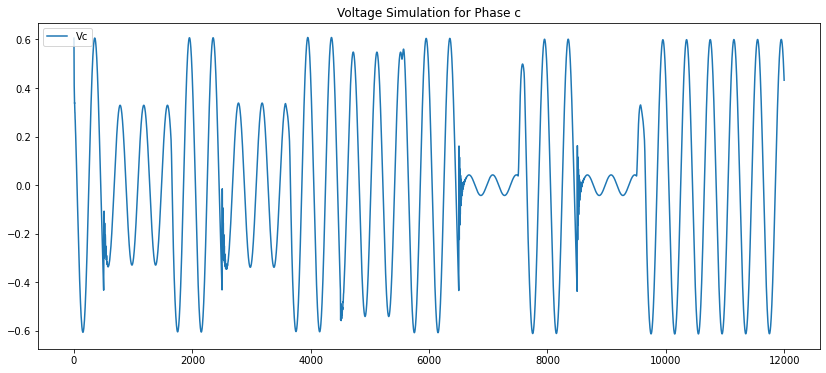

In [300]:
# Plotting the line plots for each phase
fig, ax=plt.subplots(figsize=(14,6))
detect_df.plot(y='Va', ax=ax)
plt.title('Voltage Simulation for Phase A')
plt.show()

fig, ax=plt.subplots(figsize=(14,6))
detect_df.plot(y='Vb', ax=ax)
plt.title('Voltage Simulation for Phase B')
plt.show()

fig, ax=plt.subplots(figsize=(14,6))
detect_df.plot(y='Vc', ax=ax)
plt.title('Voltage Simulation for Phase c')
plt.show()

Current simulations are smoother than that of the voltage for all the 3 phases

In [301]:
# Creating column 'fault_types'
class_df['fault_types'] = class_df['G'].astype('str') + class_df['C'].astype('str') + class_df['B'].astype('str') + class_df['A'].astype('str')
class_df.head()

G  C  B  A          Ia          Ib          Ic        Va        Vb  \
0  1  0  0  1 -151.291812   -9.677452   85.800162  0.400750 -0.132935   
1  1  0  0  1 -336.186183  -76.283262   18.328897  0.312732 -0.123633   
2  1  0  0  1 -502.891583 -174.648023  -80.924663  0.265728 -0.114301   
3  1  0  0  1 -593.941905 -217.703359 -124.891924  0.235511 -0.104940   
4  1  0  0  1 -643.663617 -224.159427 -132.282815  0.209537 -0.095554   

         Vc fault_types  
0 -0.267815        1001  
1 -0.189099        1001  
2 -0.151428        1001  
3 -0.130570        1001  
4 -0.113983        1001

In [302]:
# Getting count for target variables
print(class_df['G'].value_counts(),"\n")

0    4465
1    3396
Name: G, dtype: int64 



In [303]:
print(class_df['C'].value_counts(),"\n")

0    4628
1    3233
Name: C, dtype: int64 



In [304]:
print(class_df['B'].value_counts(),"\n")

1    4367
0    3494
Name: B, dtype: int64 



In [305]:
print(class_df['A'].value_counts(),"\n")

1    4492
0    3369
Name: A, dtype: int64 



### Value Counts of fault_types in classData

In [306]:
print(class_df['fault_types'].value_counts(),"\n")

0000    2365
1011    1134
1111    1133
1001    1129
0111    1096
0110    1004
Name: fault_types, dtype: int64 



In [307]:
# Defining the fault types in classification dataset
NF = class_df[class_df['fault_types']=='0000']
LG = class_df[class_df['fault_types']=='1001'] 
LL = class_df[class_df['fault_types']=='0110'] 
LLG = class_df[class_df['fault_types']=='1011'] 
LLL = class_df[class_df['fault_types']=='0111'] 
LLLG = class_df[class_df['fault_types']=='1111']

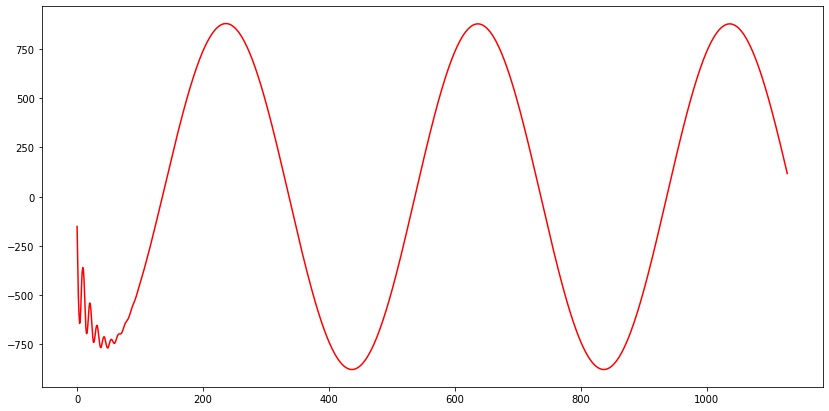

In [308]:
#Plotting LG line
plt.figure(figsize = (14,7))
plt.plot(class_df[class_df['fault_types']=='1001']["Ia"],'r')
plt.show()

### Bivariate Analysis
#### Viewing the faulty vs non-faulty Current(I) records in each of the 3 phases

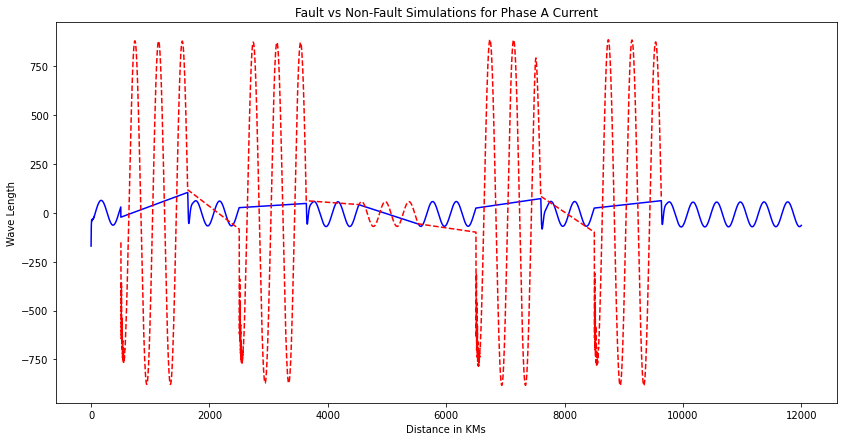

In [309]:
# Plotting the simulations for phase A
plt.figure(figsize = (14,7))
plt.plot(detect_df[detect_df['Output (S)'] == 0]["Ia"],'b')
plt.plot(detect_df[detect_df['Output (S)'] == 1]["Ia"],'r--')
plt.title('Fault vs Non-Fault Simulations for Phase A Current')
plt.xlabel('Distance in KMs')
plt.ylabel('Wave Length')
plt.show()

Faulty observations have more noise (in red) than the non-faulty ones (in blue).

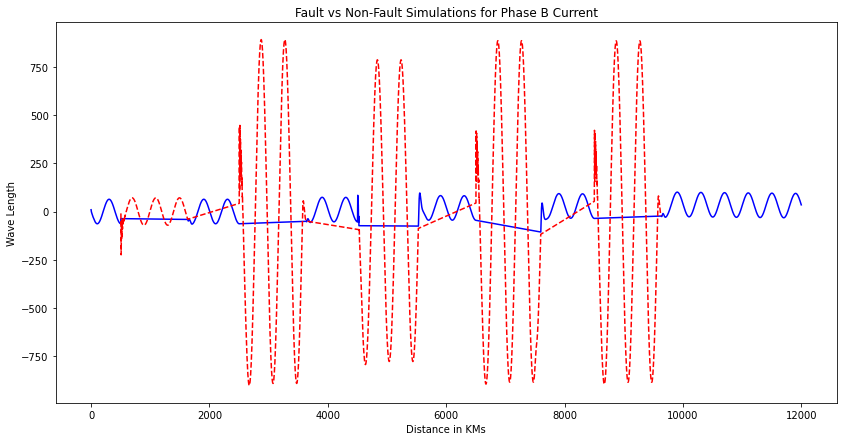

In [310]:
# Plotting the simulations for phase B
plt.figure(figsize = (14,7))
plt.plot(detect_df[detect_df['Output (S)'] == 0]["Ib"],'b')
plt.plot(detect_df[detect_df['Output (S)'] == 1]["Ib"],'r--')
plt.title('Fault vs Non-Fault Simulations for Phase B Current')
plt.xlabel('Distance in KMs')
plt.ylabel('Wave Length')
plt.show()

Faulty observations have more noise (in red) than the non-faulty ones (in blue).

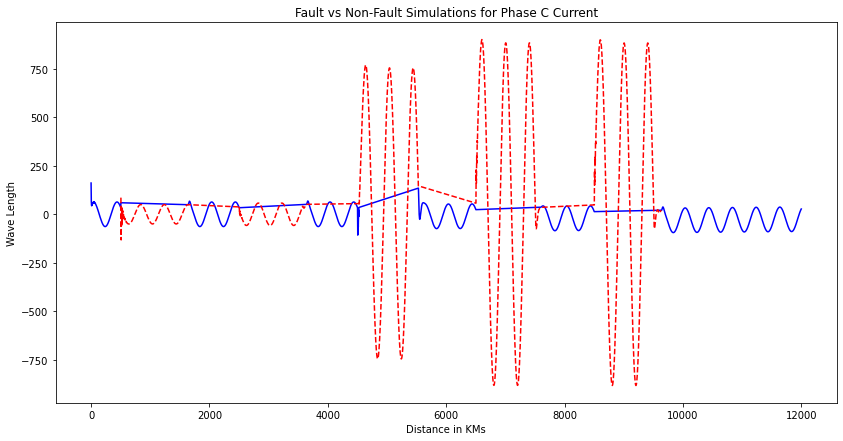

In [311]:
# Plotting the simulations for phase C
plt.figure(figsize = (14,7))
plt.plot(detect_df[detect_df['Output (S)'] == 0]["Ic"],'b')
plt.plot(detect_df[detect_df['Output (S)'] == 1]["Ic"],'r--')
plt.title('Fault vs Non-Fault Simulations for Phase C Current')
plt.xlabel('Distance in KMs')
plt.ylabel('Wave Length')
plt.show()

Faulty observations have more noise (in red) than the non-faulty ones (in blue).

### Line Plot

In [312]:
import plotly.express as px

# Line A
fig = px.line(detect_df, x = "Ia", y = "Va", title="For Line A", color = "Output (S)")
fig.show()

In [313]:
# Line B
fig = px.line(detect_df, x = "Ib", y = "Vb", title="For Line B", color = "Output (S)")
fig.show()

In [314]:
#Line C
fig = px.line(detect_df, x = "Ic", y = "Vc",title="For Line C",  color = "Output (S)")
fig.show()

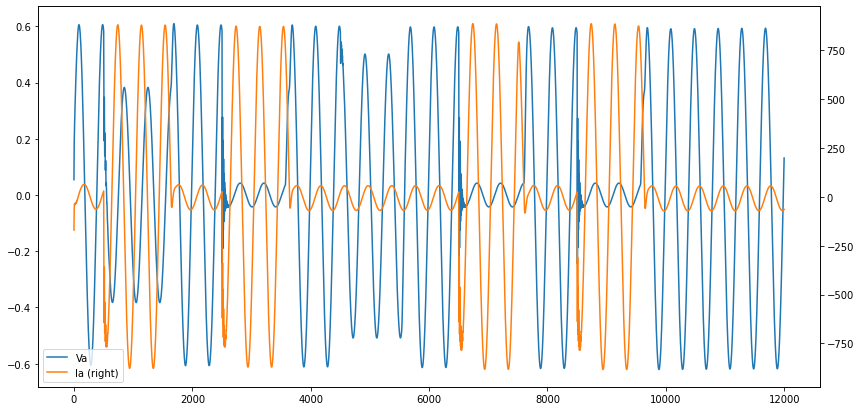

In [315]:
# Plotting phase A

fig, ax=plt.subplots(figsize=(14,7))
detect_df.plot(y='Va', ax=ax)
detect_df.plot(y='Ia', ax=ax, secondary_y=True)
plt.show()

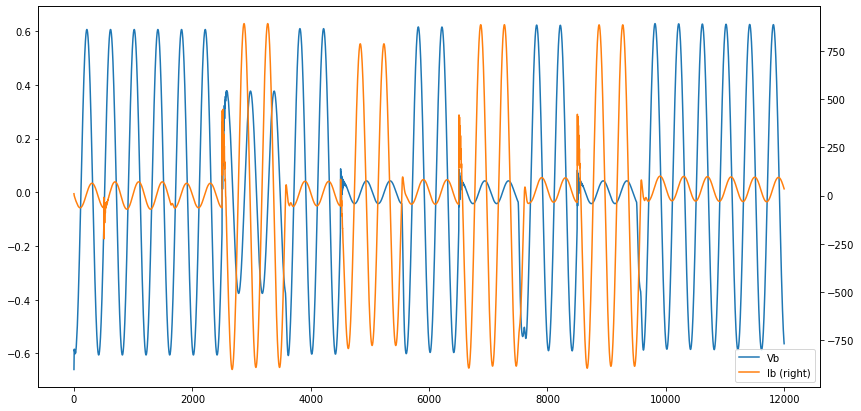

In [316]:
# Plotting phase B

fig, ax=plt.subplots(figsize=(14,7))
detect_df.plot(y='Vb', ax=ax)
detect_df.plot(y='Ib', ax=ax, secondary_y=True)
plt.show()

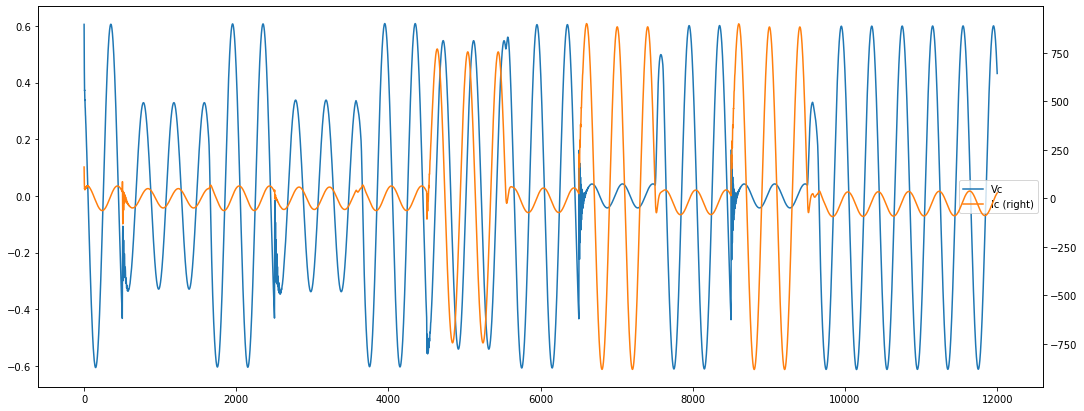

In [317]:
# Plotting phase C
fig, ax=plt.subplots(figsize=(18,7))
detect_df.plot(y='Vc', ax=ax)
detect_df.plot(y='Ic', ax=ax, secondary_y=True)
plt.show()

### Number of faults in the system according to their fault_types

[G C B A]
[0 0 0 0] -> No fault 
[1 0 0 1] -> LG fault(Between Phase A and ground)
[0 1 1 0] -> LL fault(Between Phase B and Phase C)
[1 0 1 1] -> LLG Fault(Between Phases A,B and ground)
[0 1 1 1] -> LLL Fault(Between all three phases)
[1 1 1 1] -> LLLG fault(Three phase symmetrical fault)



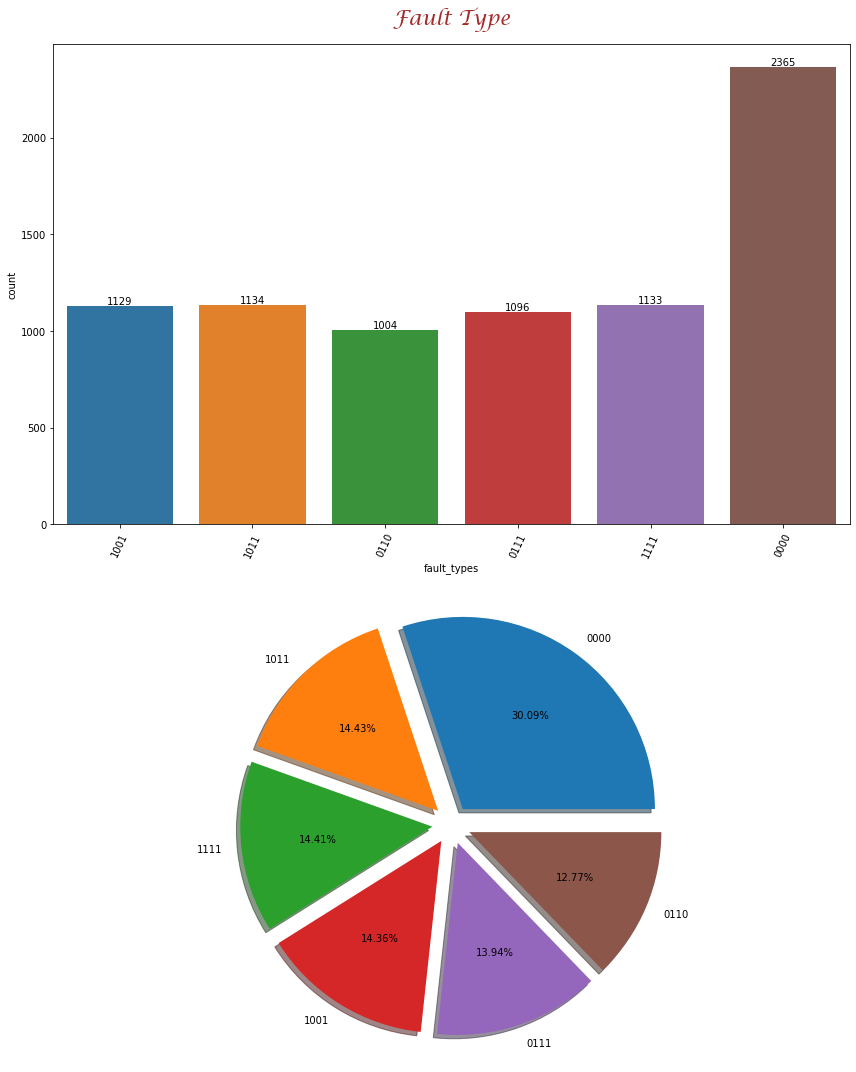

In [318]:
print("[G C B A]\n[0 0 0 0] -> No fault \n[1 0 0 1] -> LG fault(Between Phase A and ground)\n[0 1 1 0] -> LL fault(Between Phase B and Phase C)\n[1 0 1 1] -> LLG Fault(Between Phases A,B and ground)\n[0 1 1 1] -> LLL Fault(Between all three phases)\n[1 1 1 1] -> LLLG fault(Three phase symmetrical fault)\n")
fault_types = "No fault", "LG fault", "LL fault", " LLG Fault", "LLL Fault", "LLLG fault"

ax = plt.figure(figsize = (12,15))
ax = plt.subplot(2,1,1)
ax = sns.countplot(x='fault_types', data=class_df)
ax.bar_label(ax.containers[0])
plt.title("Fault Type", fontsize=20,color = 'Brown',font='Lucida Calligraphy',pad=20)
plt.xticks(rotation=65)
plt.tight_layout()

ax =plt.subplot(2,1,2)
ax=class_df['fault_types'].value_counts().plot.pie(explode=[0.1, 0.1,0.1,0.1, 0.1,0.1],autopct='%1.2f%%',shadow=True);
plt.tight_layout()
plt.axis('off');


The No fault class has the highest distribution with 2365 records, followed by LG, LL,LLG,LLL and LLLG faults with 1129,1004,1134,1096 and 1133 observations respectively.

There is an imbalance in distribution which shall be dealt with under data preprocessing for classification dataset.

### SCatter Plot

For No Fault


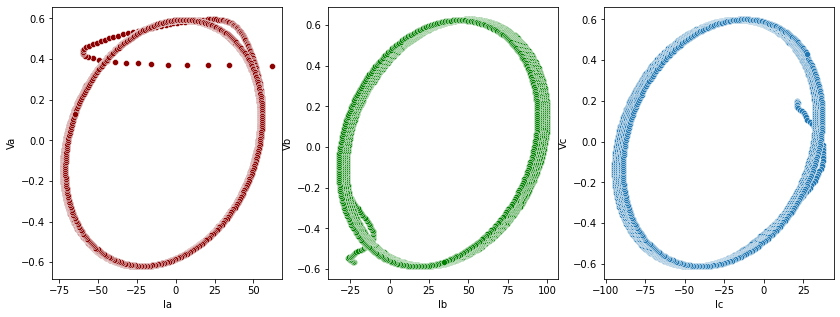

In [319]:
# # Visualize none-faulty in the 3 phases  
print("For No Fault")
plt.subplots(1,3,figsize=(14,5))
plt.subplot(131)
sns.scatterplot(x=NF['Ia'],y=NF['Va'],color='darkred')

plt.subplot(132)
sns.scatterplot(x=NF['Ib'],y=NF['Vb'],color='green')

plt.subplot(133)
sns.scatterplot(x=NF['Ic'],y=NF['Vc'])

# plt.tight_layout()
plt.show()

From the above scatterplot,The smoother the line the less there fault is likely to be present

For LG fault - Between Phase A and ground 


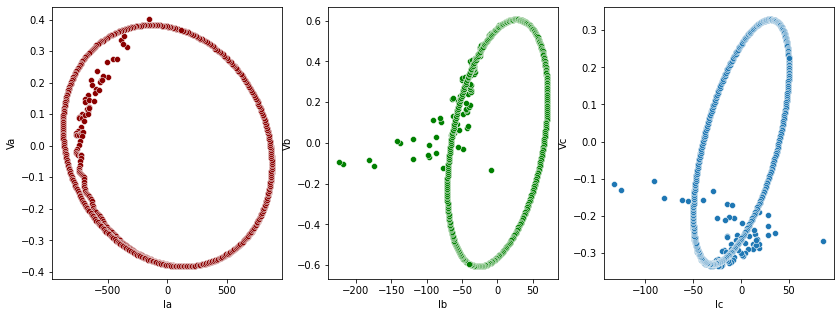

In [320]:
# # Visualize LG fault
print("For LG fault - Between Phase A and ground ")
plt.subplots(1,3,figsize=(14,5))
plt.subplot(131)
sns.scatterplot(x=LG['Ia'],y=LG['Va'],color='darkred')

plt.subplot(132)
sns.scatterplot(x=LG['Ib'],y=LG['Vb'],color='green')

plt.subplot(133)
sns.scatterplot(x=LG['Ic'],y=LG['Vc'])

# plt.tight_layout()
plt.show()

For LL fault - Between Phase A and Phase B


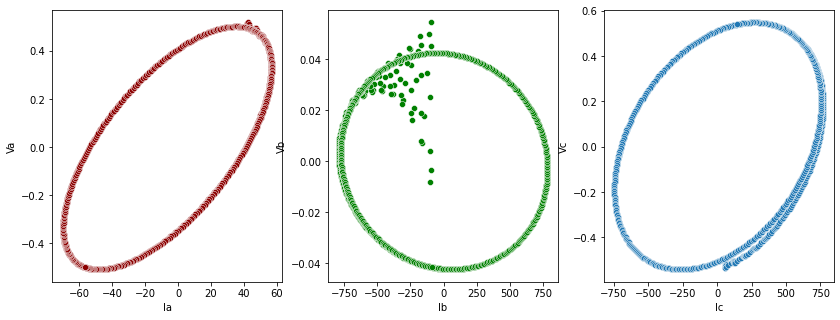

In [321]:
# # Visualize LL fault 
print("For LL fault - Between Phase A and Phase B")
plt.subplots(1,3,figsize=(14,5))
plt.subplot(131)
sns.scatterplot(x=LL['Ia'],y=LL['Va'],color='darkred')

plt.subplot(132)
sns.scatterplot(x=LL['Ib'],y=LL['Vb'],color='green')

plt.subplot(133)
sns.scatterplot(x=LL['Ic'],y=LL['Vc'])

# plt.tight_layout()
plt.show()

For LLG Fault - Between Phases A,B and Ground)


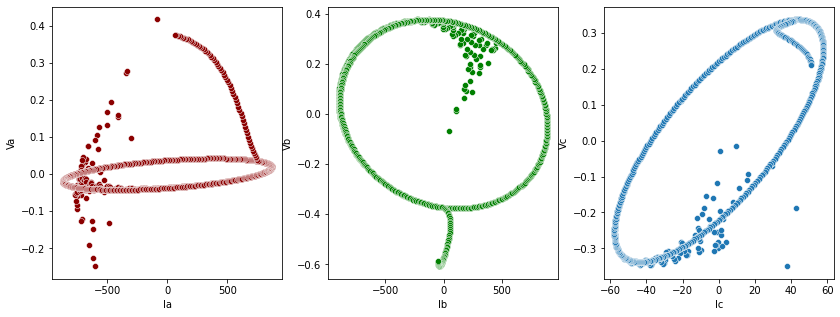

In [322]:
# # Visualize LLG fault in the 3 phases  
print("For LLG Fault - Between Phases A,B and Ground)")
plt.subplots(1,3,figsize=(14,5))
plt.subplot(131)
sns.scatterplot(x=LLG['Ia'],y=LLG['Va'],color='darkred')

plt.subplot(132)
sns.scatterplot(x=LLG['Ib'],y=LLG['Vb'],color='green')

plt.subplot(133)
sns.scatterplot(x=LLG['Ic'],y=LLG['Vc'])

# plt.tight_layout()
plt.show()

For LLL fault - Three phase symmetrical fault


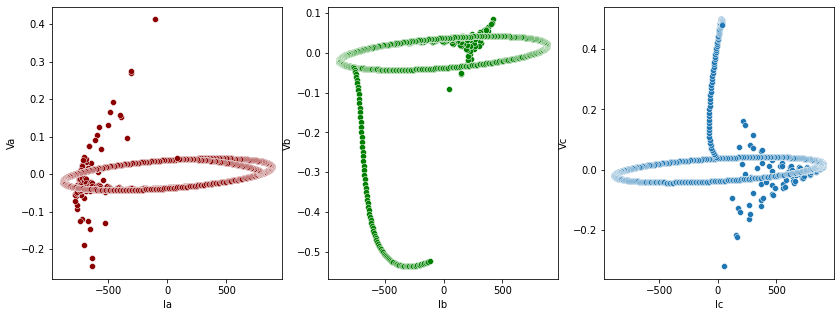

In [323]:
# # Visualize LLL fault in the 3 phases  
print("For LLL fault - Three phase symmetrical fault")
plt.subplots(1,3,figsize=(14,5))
plt.subplot(131)
sns.scatterplot(x=LLL['Ia'],y=LLL['Va'],color='darkred')

plt.subplot(132)
sns.scatterplot(x=LLL['Ib'],y=LLL['Vb'],color='green')

plt.subplot(133)
sns.scatterplot(x=LLL['Ic'],y=LLL['Vc'])

# plt.tight_layout()
plt.show()

For LLLG fault - Three phase symmetrical fault


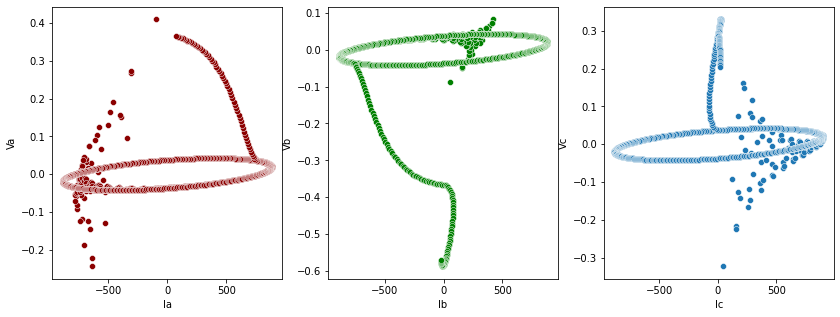

In [324]:
# # Visualize LLLG fault in the 3 phases  
print("For LLLG fault - Three phase symmetrical fault")
plt.subplots(1,3,figsize=(14,5))
plt.subplot(131)
sns.scatterplot(x=LLLG['Ia'],y=LLLG['Va'],color='darkred')

plt.subplot(132)
sns.scatterplot(x=LLLG['Ib'],y=LLLG['Vb'],color='green')

plt.subplot(133)
sns.scatterplot(x=LLLG['Ic'],y=LLLG['Vc'])

# plt.tight_layout()
plt.show()

### Multivariate Analysis

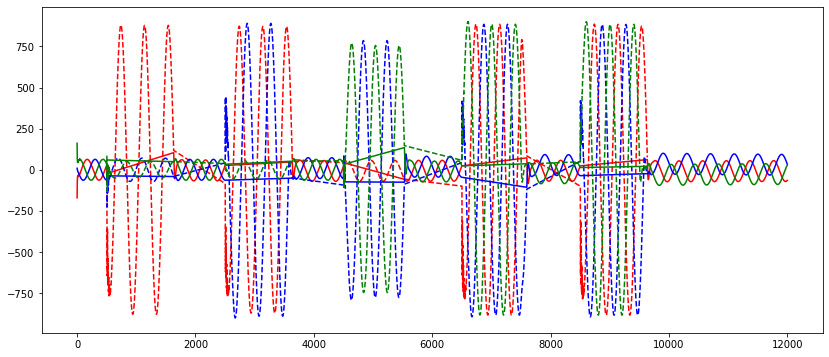

In [325]:
# Visualizing simulations in Current and Voltage flow in the 3 phases

plt.figure(figsize = (14,6))
plt.plot(detect_df[detect_df['Output (S)'] == 0]["Ia"],'r')
plt.plot(detect_df[detect_df['Output (S)'] == 1]["Ia"],'r--')
plt.plot(detect_df[detect_df['Output (S)'] == 0]["Ib"],'b')
plt.plot(detect_df[detect_df['Output (S)'] == 1]["Ib"],'b--')
plt.plot(detect_df[detect_df['Output (S)'] == 0]["Ic"],'g')
plt.plot(detect_df[detect_df['Output (S)'] == 1]["Ic"],'g--')
plt.show()

Text(0, 0.5, 'Wave Length')

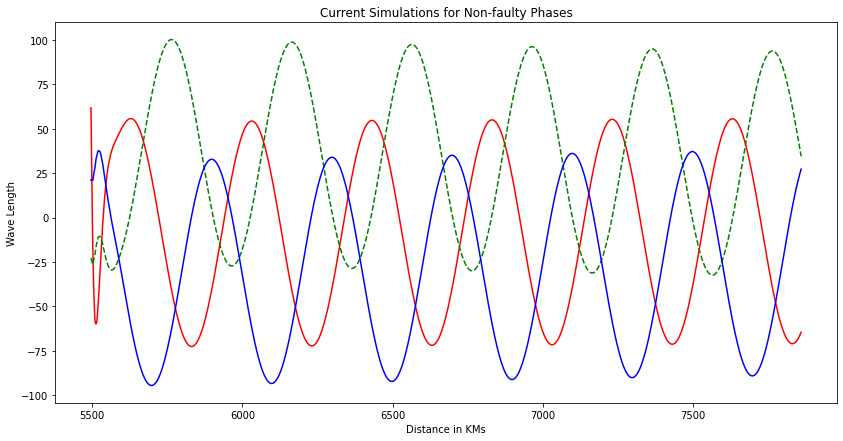

In [326]:
#Plotting all non fault conditions 
plt.figure(figsize = (14,7))
plt.plot(class_df[class_df['fault_types']=='0000']["Ia"],'r')
plt.plot(class_df[class_df['fault_types']=='0000']["Ib"],'g--')
plt.plot(class_df[class_df['fault_types']=='0000']["Ic"],'b')
plt.title('Current Simulations for Non-faulty Phases')
plt.xlabel('Distance in KMs')
plt.ylabel('Wave Length')


For non faulty lines, the wavelengh for each phase is uniform with a smooth current flow.

### Wave of the Votage and Current Faults in Transmission line

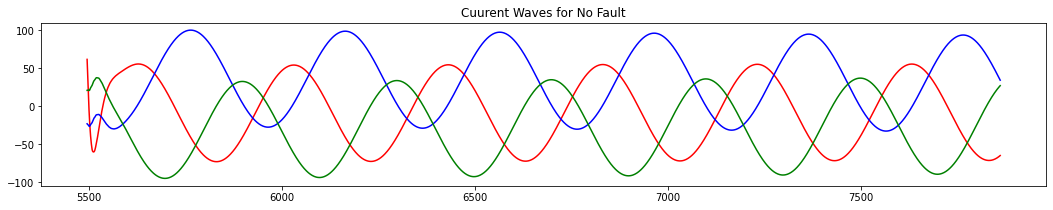

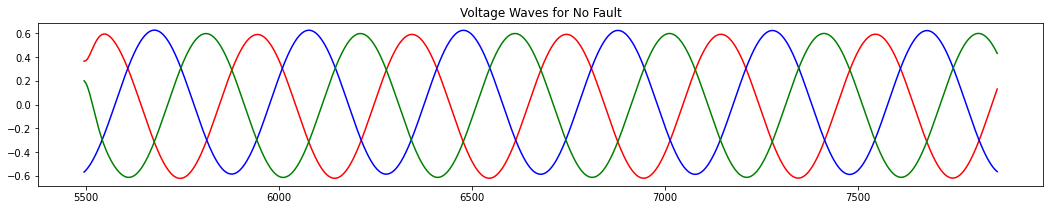

In [327]:
# # Visualize none-faulty in the 3 phasesPrint('No Fault')

ax = plt.figure(figsize = (18,3))
ax = plt.plot(NF["Ia"],'r')
ax = plt.plot(NF["Ib"],'b')
ax = plt.plot(NF["Ic"],'g')
plt.title('Cuurent Waves for No Fault');

ax = plt.figure(figsize = (18,3))
ax = plt.plot(NF["Va"],'r')
ax = plt.plot(NF["Vb"],'b')
ax = plt.plot(NF["Vc"],'g')
plt.title('Voltage Waves for No Fault');

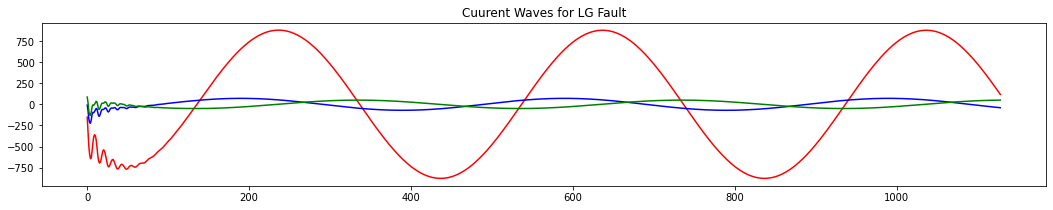

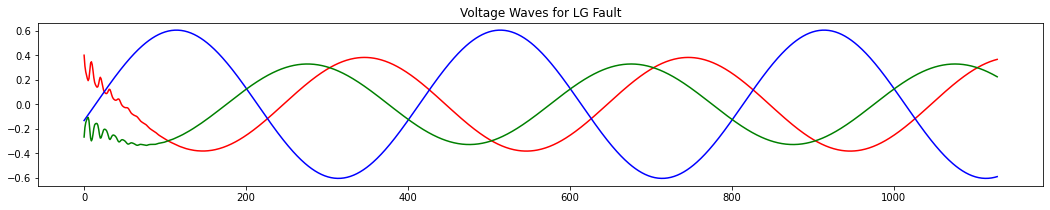

In [328]:
# # Visualize LG fault
ax = plt.figure(figsize = (18,3))
ax = plt.plot(LG["Ia"],'r')
ax = plt.plot(LG["Ib"],'b')
ax = plt.plot(LG["Ic"],'g');
plt.title('Cuurent Waves for LG Fault');

ax = plt.figure(figsize = (18,3))
ax = plt.plot(LG["Va"],'r')
ax = plt.plot(LG["Vb"],'b')
ax = plt.plot(LG["Vc"],'g')
plt.title('Voltage Waves for LG Fault');

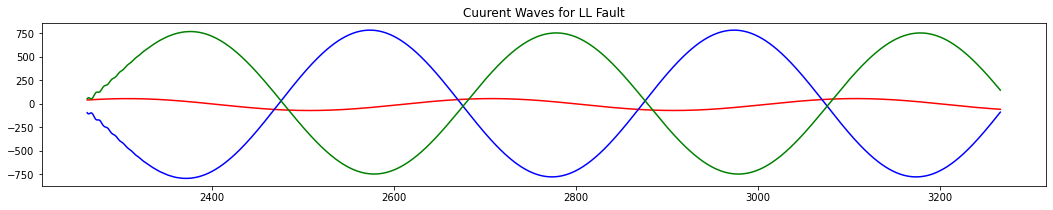

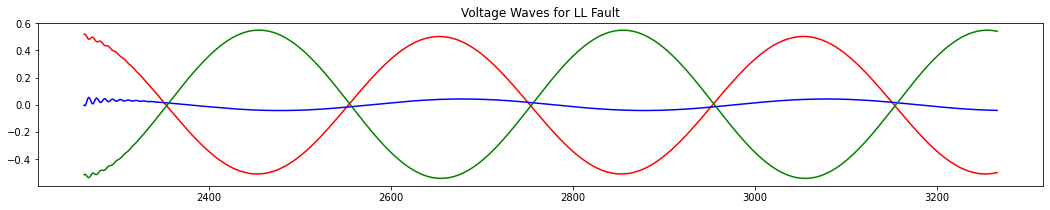

In [329]:
# # Visualize LL fault
ax = plt.figure(figsize = (18,3))
ax = plt.plot(LL["Ia"],'r')
ax = plt.plot(LL["Ib"],'b')
ax = plt.plot(LL["Ic"],'g');
plt.title('Cuurent Waves for LL Fault');

ax = plt.figure(figsize = (18,3))
ax = plt.plot(LL["Va"],'r')
ax = plt.plot(LL["Vb"],'b')
ax = plt.plot(LL["Vc"],'g')
plt.title('Voltage Waves for LL Fault');

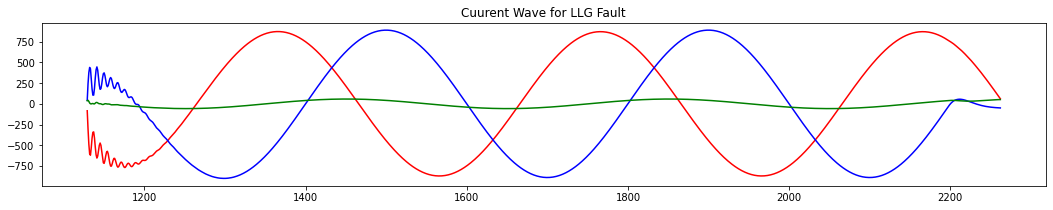

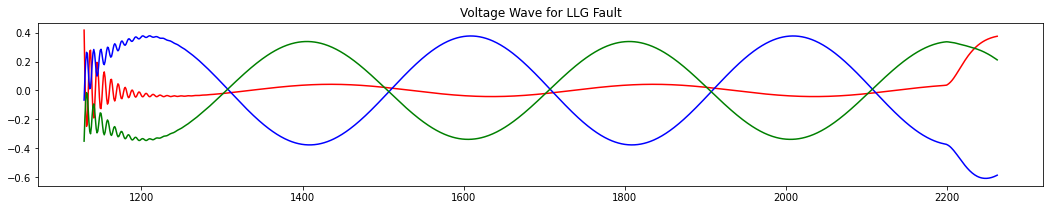

In [330]:
# Visualize LLG fault in the 3 phases 
ax = plt.figure(figsize = (18,3))
ax = plt.plot(LLG["Ia"],'r')
ax = plt.plot(LLG["Ib"],'b')
ax = plt.plot(LLG["Ic"],'g')
plt.title('Cuurent Wave for LLG Fault');

ax = plt.figure(figsize = (18,3))
ax = plt.plot(LLG["Va"],'r')
ax = plt.plot(LLG["Vb"],'b')
ax = plt.plot(LLG["Vc"],'g')
plt.title('Voltage Wave for LLG Fault');

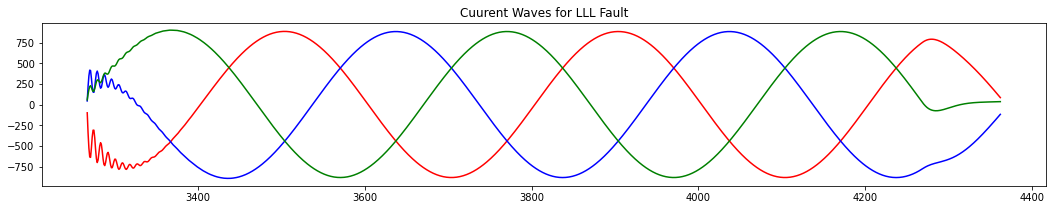

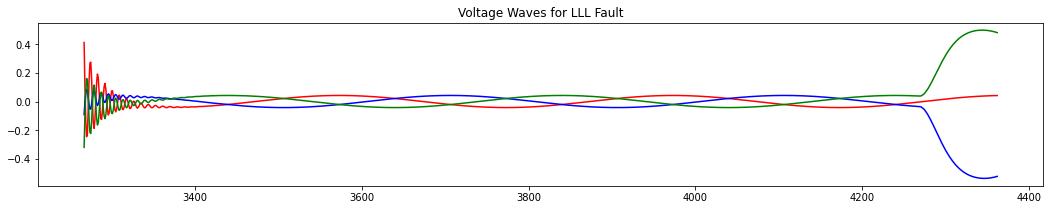

In [331]:
# Visualize LLL fault in the 3 phases
ax = plt.figure(figsize = (18,3))
ax = plt.plot(LLL["Ia"],'r')
ax = plt.plot(LLL["Ib"],'b')
ax = plt.plot(LLL["Ic"],'g');
plt.title('Cuurent Waves for LLL Fault');

ax = plt.figure(figsize = (18,3))
ax = plt.plot(LLL["Va"],'r')
ax = plt.plot(LLL["Vb"],'b')
ax = plt.plot(LLL["Vc"],'g')
plt.title('Voltage Waves for LLL Fault');

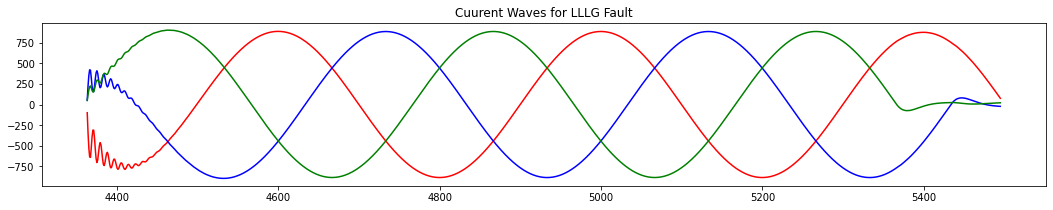

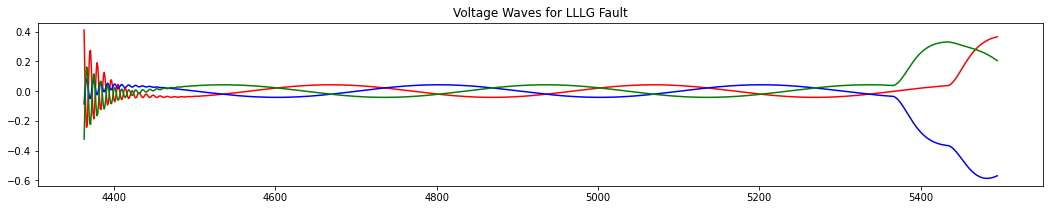

In [332]:
# Visualize LLLG fault in the 3 phases 

ax = plt.figure(figsize = (18,3))
ax = plt.plot(LLLG["Ia"],'r')
ax = plt.plot(LLLG["Ib"],'b')
ax = plt.plot(LLLG["Ic"],'g');
plt.title('Cuurent Waves for LLLG Fault');

ax = plt.figure(figsize = (18,3))
ax = plt.plot(LLLG["Va"],'r')
ax = plt.plot(LLLG["Vb"],'b')
ax = plt.plot(LLLG["Vc"],'g')
plt.title('Voltage Waves for LLLG Fault');

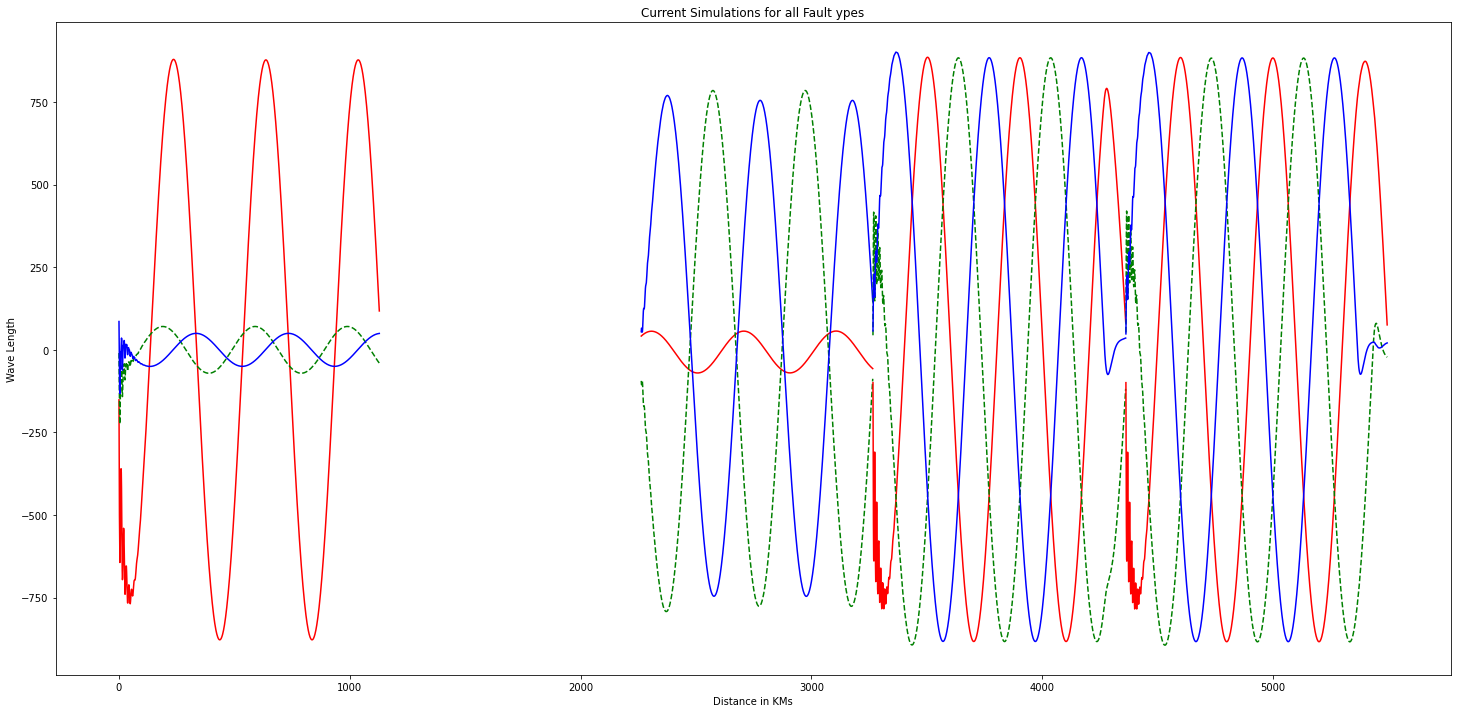

In [333]:
#Plotting all fault types in Current in the 3 phases
plt.figure(figsize = (25,12))
plt.plot(class_df[class_df['fault_types']=='1001']["Ia"],'r')
plt.plot(class_df[class_df['fault_types']=='1001']["Ib"],'g--')
plt.plot(class_df[class_df['fault_types']=='1001']["Ic"],'b')

plt.plot(class_df[class_df['fault_types']=='0110']["Ia"],'r')
plt.plot(class_df[class_df['fault_types']=='0110']["Ib"],'g--')
plt.plot(class_df[class_df['fault_types']=='0110']["Ic"],'b')

plt.plot(class_df[class_df['fault_types']=='0111']["Ia"],'r')
plt.plot(class_df[class_df['fault_types']=='0111']["Ib"],'g--')
plt.plot(class_df[class_df['fault_types']=='0111']["Ic"],'b')

plt.plot(class_df[class_df['fault_types']=='1111']["Ia"],'r')
plt.plot(class_df[class_df['fault_types']=='1111']["Ib"],'g--')
plt.plot(class_df[class_df['fault_types']=='1111']["Ic"],'b')

plt.title('Current Simulations for all Fault ypes')
plt.xlabel('Distance in KMs')
plt.ylabel('Wave Length');

## Data preprocessing - Detect Dataset

In [334]:
# Importing relevant libraries

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn import metrics

In [335]:
# Scaling detectData dataset
detect_ip = detect_df.drop(columns=['Output (S)'], axis=1)
dipc = detect_ip.columns

mms = MinMaxScaler()
detect_df_ip = mms.fit_transform(detect_ip)

detect_ip = pd.DataFrame(detect_df_ip, columns=dipc)

detect_op = detect_df.iloc[:,0]

In [336]:
detect_ip.head(3)

Ia        Ib        Ic        Va        Vb        Vc
0  0.403028  0.508126  0.585337  0.548701  0.000000  0.997697
1  0.430292  0.506422  0.560017  0.587308  0.024312  0.932806
2  0.448420  0.505107  0.543364  0.619020  0.042432  0.882066

In [337]:
detect_op.head(3)

0    0
1    0
2    0
Name: Output (S), dtype: int64

### Train Test Split

In [338]:
# Splitting Data on detectData 
detect_train_x, detect_test_x, detect_train_y, detect_test_y = train_test_split(detect_ip, detect_op, test_size=0.20, random_state=42)

In [339]:
detect_train_x.shape

(9600, 6)

In [340]:
detect_test_x.shape

(2401, 6)

In [341]:
detect_train_y.shape

(9600,)

In [342]:
detect_test_y.shape

(2401,)

## Model Building - Detect Dataset

### Decision Tree Classifier

In [343]:
# Create a decision tree classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,plot_confusion_matrix

tree = DecisionTreeClassifier(criterion='gini', ccp_alpha=0.0040)

# Train it on our training set.
tree = tree.fit(detect_train_x, detect_train_y)

# Predict based on the model we've trained
y_pred_dt = tree.predict(detect_test_x)

The Error of  Detection Model is:  0.007913369429404415
Training Accuracy    : 98.91 %
Model Accuracy Score : 99.21 %
--------------------------------------------------------
Classification_Report: 
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      1306
           1       1.00      0.99      0.99      1095

    accuracy                           0.99      2401
   macro avg       0.99      0.99      0.99      2401
weighted avg       0.99      0.99      0.99      2401

--------------------------------------------------------


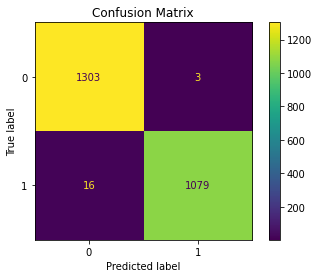

In [344]:
dt_train = round(tree.score(detect_train_x, detect_train_y) * 100, 2)
dt_accuracy = round(accuracy_score(y_pred_dt, detect_test_y) * 100, 2)
print('The Error of  Detection Model is: ',mean_squared_error(detect_test_y,y_pred_dt))

print("Training Accuracy    :",dt_train ,"%")
print("Model Accuracy Score :",dt_accuracy ,"%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification_Report: \n",classification_report(detect_test_y,y_pred_dt))
print("\033[1m--------------------------------------------------------\033[0m")
plot_confusion_matrix(tree, detect_test_x, detect_test_y);
plt.title('Confusion Matrix');

In [355]:
#Generate the confusion matrix
dt_cf_matrix = confusion_matrix(detect_test_y, y_pred_dt)

print(dt_cf_matrix)

[[1303    3]
 [  16 1079]]


In [346]:
TP = dt_cf_matrix[1,1] # true positive 
TN = dt_cf_matrix[0,0] # true negatives
FP = dt_cf_matrix[0,1] # false positives
FN = dt_cf_matrix[1,0] # false negatives

### Precision, Recall and F1 Score

In [347]:
#Check precion for model
Precision = TP/float(TP+FP)
Precision

0.9972273567467652

In [348]:
# Recall
Recall = TP/float(TP + FN)
Recall

0.9853881278538813

In [349]:
specificity = TN/float(TN + FP)
specificity

0.9977029096477795

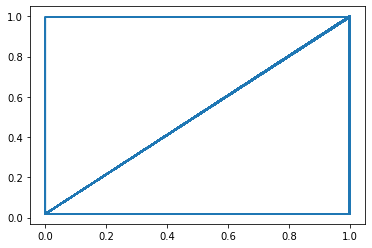

In [247]:
from sklearn.metrics import roc_curve, roc_auc_score
# Predicted probability
y_test_pred_proba_dt = tree.predict_proba(detect_test_x)[:,1]

# Plot the ROC curve
plt.plot(detect_test_y, y_test_pred_proba_dt);

In [350]:
# Check for F1-Score.

F1_Score = 2 * ((Precision * Recall) / (Precision + Recall))
F1_Score

0.9912723932016536

### Random Forest Classifier

The Error of  Detection Model is:  0.006663890045814244
Training Accuracy    : 99.21 %
Model Accuracy Score : 99.33 %
--------------------------------------------------------
Classification_Report: 
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      1306
           1       1.00      0.99      0.99      1095

    accuracy                           0.99      2401
   macro avg       0.99      0.99      0.99      2401
weighted avg       0.99      0.99      0.99      2401

--------------------------------------------------------


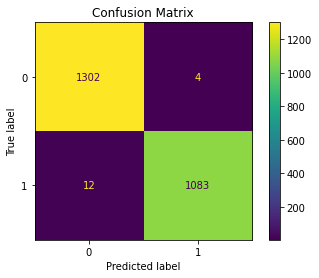

In [352]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(max_depth=10, min_samples_leaf=30, min_samples_split=30, n_estimators=20)
random_forest.fit(detect_train_x, detect_train_y)
y_pred_rf = random_forest.predict(detect_test_x)
random_forest.score(detect_train_x, detect_train_y)

random_forest_train = round(random_forest.score(detect_train_x, detect_train_y) * 100, 2)
random_forest_accuracy = round(accuracy_score(y_pred_rf, detect_test_y) * 100, 2)
print('The Error of  Detection Model is: ',mean_squared_error(detect_test_y,y_pred_rf))

print("Training Accuracy    :",random_forest_train ,"%")
print("Model Accuracy Score :",random_forest_accuracy ,"%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification_Report: \n",classification_report(detect_test_y,y_pred_rf))
print("\033[1m--------------------------------------------------------\033[0m")
plot_confusion_matrix(random_forest, detect_test_x, detect_test_y);
plt.title('Confusion Matrix');

In [354]:
#Generate the confusion matrix
rf_cf_matrix = confusion_matrix(detect_test_y, y_pred_rf)

print(rf_cf_matrix)

[[1302    4]
 [  12 1083]]


In [356]:
TP = rf_cf_matrix[1,1] # true positive 
TN = rf_cf_matrix[0,0] # true negatives
FP = rf_cf_matrix[0,1] # false positives
FN = rf_cf_matrix[1,0] # false negatives

### Precision, Recall and F1 Score

In [357]:
#Check precion for model
Precision = TP/float(TP+FP)
Precision

0.9963201471941122

In [358]:
# Recall
Recall = TP/float(TP + FN)
Recall

0.989041095890411

In [359]:
specificity = TN/float(TN + FP)
specificity

0.996937212863706

In [360]:
# Check for F1-Score.

F1_Score = 2 * ((Precision * Recall) / (Precision + Recall))
F1_Score

0.992667277726856

### Naive Bayes

In [361]:
#Defining the Model for the classification problem
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import mean_squared_error

detect_nb = GaussianNB()

#Fitting the data in different models
nb_model = detect_nb.fit(detect_train_x, detect_train_y)

The Error of  Detection Model is:  0.018325697625989172
Training Accuracy    : 99.21 %
Model Accuracy Score : 99.33 %
--------------------------------------------------------
Classification_Report: 
               precision    recall  f1-score   support

           0       0.97      1.00      0.98      1306
           1       1.00      0.96      0.98      1095

    accuracy                           0.98      2401
   macro avg       0.98      0.98      0.98      2401
weighted avg       0.98      0.98      0.98      2401

--------------------------------------------------------


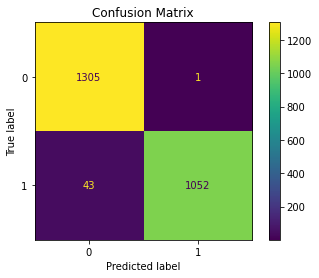

In [362]:
y_pred_nb = detect_nb.predict(detect_test_x)
detect_nb.score(detect_train_x, detect_train_y)

naive_bayes_train = round(detect_nb.score(detect_train_x, detect_train_y) * 100, 2)
naive_bayes_accuracy = round(accuracy_score(y_pred_nb, detect_test_y) * 100, 2)
print('The Error of  Detection Model is: ',mean_squared_error(detect_test_y,y_pred_nb))

print("Training Accuracy    :",random_forest_train ,"%")
print("Model Accuracy Score :",random_forest_accuracy ,"%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification_Report: \n",classification_report(detect_test_y,y_pred_nb))
print("\033[1m--------------------------------------------------------\033[0m")
plot_confusion_matrix(detect_nb, detect_test_x, detect_test_y);
plt.title('Confusion Matrix');

In [363]:
#Generate the confusion matrix
nb_cf_matrix = confusion_matrix(detect_test_y, y_pred_nb)

print(nb_cf_matrix)

[[1305    1]
 [  43 1052]]


In [366]:
TP = nb_cf_matrix[1,1] # true positive 
TN = nb_cf_matrix[0,0] # true negatives
FP = nb_cf_matrix[0,1] # false positives
FN = nb_cf_matrix[1,0] # false negatives

### Precision, Recall and F1 Score

In [367]:
#Check precion for model
Precision = TP/float(TP+FP)
Precision

0.9990503323836657

In [368]:
# Recall
Recall = TP/float(TP + FN)
Recall

0.960730593607306

In [369]:
specificity = TN/float(TN + FP)
specificity

0.9992343032159265

In [370]:
# Check for F1-Score.

F1_Score = 2 * ((Precision * Recall) / (Precision + Recall))
F1_Score

0.9795158286778398

### Support Vector Machine(SVM)

The Error of  Detection Model is:  0.014993752603082049
Training Accuracy    : 98.26 %
Model Accuracy Score : 98.5 %
--------------------------------------------------------
Classification_Report: 
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      1306
           1       1.00      0.97      0.98      1095

    accuracy                           0.99      2401
   macro avg       0.99      0.98      0.98      2401
weighted avg       0.99      0.99      0.98      2401

--------------------------------------------------------


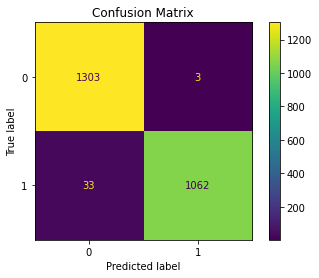

In [372]:
# Support Vector Machines
from sklearn.svm import SVC
svc = SVC()
svc.fit(detect_train_x, detect_train_y)
y_pred_svc = svc.predict(detect_test_x)

svc_train = round(svc.score(detect_train_x, detect_train_y) * 100, 2)
svc_accuracy = round(accuracy_score(y_pred_svc, detect_test_y) * 100, 2)
print('The Error of  Detection Model is: ',mean_squared_error(detect_test_y,y_pred_svc))

print("Training Accuracy    :",svc_train ,"%")
print("Model Accuracy Score :",svc_accuracy ,"%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification_Report: \n",classification_report(detect_test_y,y_pred_svc))
print("\033[1m--------------------------------------------------------\033[0m")
plot_confusion_matrix(svc, detect_test_x, detect_test_y);
plt.title('Confusion Matrix');

In [373]:
#Generate the confusion matrix
svc_cf_matrix = confusion_matrix(detect_test_y, y_pred_svc)

print(svc_cf_matrix)

[[1303    3]
 [  33 1062]]


In [374]:
TP = svc_cf_matrix[1,1] # true positive 
TN = svc_cf_matrix[0,0] # true negatives
FP = svc_cf_matrix[0,1] # false positives
FN = svc_cf_matrix[1,0] # false negatives

### Precision, Recall and F1 Score

In [375]:
#Check precion for model
Precision = TP/float(TP+FP)
Precision

0.9971830985915493

In [376]:
# Recall
Recall = TP/float(TP + FN)
Recall

0.9698630136986301

In [377]:
specificity = TN/float(TN + FP)
specificity

0.9977029096477795

In [378]:
# Check for F1-Score.

F1_Score = 2 * ((Precision * Recall) / (Precision + Recall))
F1_Score

0.9833333333333334

### Multi-Layer Perceptron (MLP)

In [206]:
# Import relevant libraries 
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import mean_squared_error

In [219]:
#Defining the classification model for fault detection 

detection_model = MLPClassifier(activation='relu', solver='adam', alpha=1e-5,
                    hidden_layer_sizes=(100,60,20), random_state=10,max_iter = 500)

In [220]:
# Fitting the model

detection_model.fit(detect_train_x, detect_train_y)

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(100, 60, 20), max_iter=500,
              random_state=10)

The Error of  Detection Model is:  0.004581424406497293
Training Accuracy    : 99.3 %
Model Accuracy Score : 99.54 %
--------------------------------------------------------
Classification_Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1306
           1       1.00      0.99      0.99      1095

    accuracy                           1.00      2401
   macro avg       1.00      1.00      1.00      2401
weighted avg       1.00      1.00      1.00      2401

--------------------------------------------------------


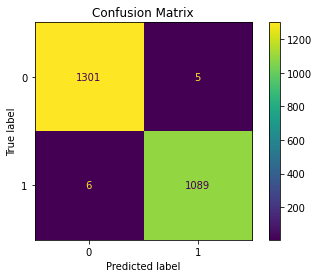

In [221]:
y_pred_mlp = detection_model.predict(detect_test_x)

mlp_train = round(detection_model.score(detect_train_x, detect_train_y) * 100, 2)
mlp_accuracy = round(accuracy_score(y_pred_mlp, detect_test_y) * 100, 2)
print('The Error of  Detection Model is: ',mean_squared_error(detect_test_y,y_pred_mlp))

print("Training Accuracy    :",mlp_train ,"%")
print("Model Accuracy Score :",mlp_accuracy ,"%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification_Report: \n",classification_report(detect_test_y,y_pred_mlp))
print("\033[1m--------------------------------------------------------\033[0m")
plot_confusion_matrix(detection_model, detect_test_x, detect_test_y);
plt.title('Confusion Matrix');

### Hyper Parameter Tuning

In [226]:
param_grid = {
    'hidden_layer_sizes': [(150,100,50), (120,80,40), (100,50,30)],
    'max_iter': [50, 100, 150],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}

In [224]:
grid_mlp = GridSearchCV(detection_model, param_grid, n_jobs= -1, cv=5)
grid_mlp.fit(detect_test_x,detect_test_y)

print(grid_mlp.best_params_)

{'activation': 'relu', 'alpha': 0.05, 'hidden_layer_sizes': (150, 100, 50), 'learning_rate': 'constant', 'max_iter': 100, 'solver': 'adam'}


In [390]:
grid_predictions = grid_mlp.predict(detect_test_x) 

print('Accuracy: {:.2f}'.format(accuracy_score(detect_test_y,grid_predictions)))

Accuracy: 0.98


In [382]:
#Generate the confusion matrix
mlp_cf_matrix = confusion_matrix(detect_test_y, y_pred_mlp)

print(mlp_cf_matrix)

[[1301    5]
 [   6 1089]]


In [384]:
TP = mlp_cf_matrix[1,1] # true positive 
TN = mlp_cf_matrix[0,0] # true negatives
FP = mlp_cf_matrix[0,1] # false positives
FN = mlp_cf_matrix[1,0] # false negatives

### Precision, Recall and F1 Score

In [385]:
#Check precion for model
Precision = TP/float(TP+FP)
Precision

0.9954296160877514

In [386]:
# Recall
Recall = TP/float(TP + FN)
Recall

0.9945205479452055

In [387]:
specificity = TN/float(TN + FP)
specificity

0.9961715160796325

In [388]:
# Check for F1-Score.

F1_Score = 2 * ((Precision * Recall) / (Precision + Recall))
F1_Score

0.9949748743718593